# 1. INTRODUCTION

The data contains the following columns:

**Store:** Store number

**Date:** Sales week start date

**Weekly_Sales:** Sales

**Holiday_Flag:** Mark on the presence or absence of a holiday

T**emperature:** Air temperature in the region

**Fuel_Price:** Fuel cost in the region

**CPI:** Consumer price index

**Unemployment:** Unemployment rate

# 2. IMPORTS

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# 3. STYLE

In [2]:
plt.style.use('fivethirtyeight')

# 4. WARNINGS

In [3]:
import warnings
warnings.filterwarnings('ignore')

# 5. VIEWS

In [4]:
pd.set_option('display.max_columns', None)

# 6. LOADING

In [10]:
df = pd.read_csv(r'/Users/distinctiveepiphany/Downloads/Walmart_sales (1).csv', parse_dates = ['Date'])
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


# 7. EDA

## 7.1 Overview

In [11]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


## 7.2 Shape and Size

In [13]:
# Shape and size

print(f'The shape of the table: {df.shape}')

print(f'The size is : {df.size}')


The shape of the table: (6435, 8)
The size is : 51480


## 7.3 Info()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


- date is already converted to datetime while loading using parse_dates
- we need to get it into a format

## converting all columns into lower 

In [17]:
df.columns = [i.lower() for i in df.columns]
df.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

## converting the datetime to desired format

In [19]:
# converting date column to desired format

df['date'] = pd.to_datetime(df['date'], format = '%d-%m-%Y')


In [20]:
df.head(2)

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106


In [21]:
df['date'] = df['date'].dt.strftime('%d-%m-%Y')

In [23]:
df.head(2)

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,02-05-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,02-12-2010,1641957.44,1,38.51,2.548,211.242170,8.106


In [24]:
df.info() #look it is back into object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         6435 non-null   int64  
 1   date          6435 non-null   object 
 2   weekly_sales  6435 non-null   float64
 3   holiday_flag  6435 non-null   int64  
 4   temperature   6435 non-null   float64
 5   fuel_price    6435 non-null   float64
 6   cpi           6435 non-null   float64
 7   unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [25]:
df['date'] = pd.to_datetime(df['date'])


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         6435 non-null   int64         
 1   date          6435 non-null   datetime64[ns]
 2   weekly_sales  6435 non-null   float64       
 3   holiday_flag  6435 non-null   int64         
 4   temperature   6435 non-null   float64       
 5   fuel_price    6435 non-null   float64       
 6   cpi           6435 non-null   float64       
 7   unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [27]:
df.head(4)

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106


## Top 15 Stores By Weekly Value

## we shall use groupby() and sort_values()

In [35]:
df.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [37]:
dfx1 = df[['store','weekly_sales']].groupby('store').sum().reset_index()
dfx1.head()

,store,weekly_sales
0,1,2.224028e+08
1,2,2.753824e+08
2,3,5.758674e+07
3,4,2.995440e+08
4,5,4.547569e+07


In [39]:
dfx2 = dfx1.sort_values(by = ['weekly_sales'], ascending = False)[:15] # we required top 15 stores with highest weekly sales
dfx2

,store,weekly_sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08
9,10,2.716177e+08
26,27,2.538559e+08
5,6,2.237561e+08
0,1,2.224028e+08
38,39,2.074455e+08


### Plotting:

In [44]:
dfx2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 19 to 10
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         15 non-null     int64  
 1   weekly_sales  15 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1000.0 bytes


In [65]:
aa = list(dfx2['store'].values)
aa.reverse()
aa


[11, 24, 23, 31, 19, 39, 1, 6, 27, 10, 2, 13, 14, 4, 20]

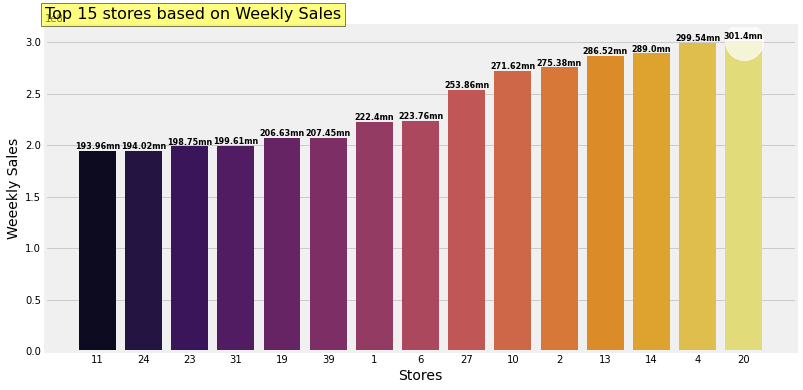

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt 

order_1 = [11, 24, 23, 31, 19, 39, 1, 6, 27, 10, 2, 13, 14, 4, 20]

plt.figure(figsize = (12,6))
ax = sns.barplot(x = 'store', y = 'weekly_sales', data = dfx2, order = order_1, palette = 'inferno',errcolor = 'red',
            ci = 100)



for container in (ax.containers):
    for bar in (container): 
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/ 2, h, f'{str(round(h/1000000,2))}mn', fontsize = 8, fontweight = 'bold',
                ha = 'center', va = 'bottom')


v = ax.containers[0][14].get_height()
plt.plot(14,v,'o', markersize = 38,color = 'white', alpha = 0.7)


plt.title('Top 15 stores based on Weekly Sales', fontsize = 16, bbox = {'facecolor': 'yellow',
                                                                       'linewidth': 1,
                                                                       'edgecolor': 'black',
                                                                       'alpha': 0.5},
         loc = 'left')

plt.xlabel('Stores', fontsize = 14)
plt.ylabel('Weeekly Sales',fontsize = 14)
plt.show()

## Show The COntribution of Top 15 Stores wrt total sales vs contribution by remaining stores

In [123]:
df.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [129]:
dfxx = df[['store','weekly_sales']].groupby('store').sum().reset_index()
dfxx.head()

,store,weekly_sales
0,1,2.224028e+08
1,2,2.753824e+08
2,3,5.758674e+07
3,4,2.995440e+08
4,5,4.547569e+07


In [128]:
df_sorted = dfxx.sort_values(by = ['weekly_sales'], ascending = False)
df_sorted.head()

,store,weekly_sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08


### dataframe with top15 stores only

In [133]:
df_top15 = df_sorted.iloc[:15]
df_top15

,store,weekly_sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08
9,10,2.716177e+08
26,27,2.538559e+08
5,6,2.237561e+08
0,1,2.224028e+08
38,39,2.074455e+08


In [134]:
total_sales_top15 = df_top15['weekly_sales'].sum()
total_sales_top15

3623898108.219999

### dataframe with remaining stores

In [137]:
df_remaining30 = df_sorted.iloc[15:]
df_remaining30.head()

,store,weekly_sales
27,28,1.892637e+08
40,41,1.813419e+08
31,32,1.668192e+08
17,18,1.551147e+08
21,22,1.470756e+08


In [138]:
total_sales_remaining30 = df_remaining30['weekly_sales'].sum()
total_sales_remaining30

3113320878.8900003

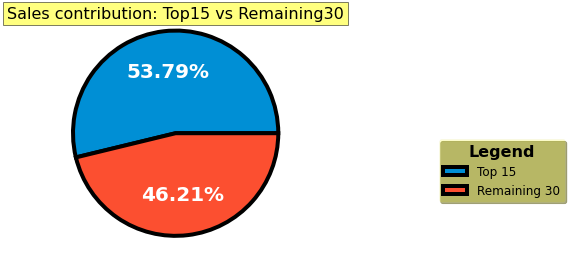

In [215]:
sales = [total_sales_top15,total_sales_remaining30]
l = ['Top 15', 'Remaining 30']

import matplotlib.pyplot as plt 
import seaborn as sn



plt.pie(sales,labels = l, radius = 1.18, autopct = '%0.2f%%',
        textprops = {'fontsize': 20,'color': 'white', 'fontweight': 'bold'},
        wedgeprops = {'linewidth': 4, 'edgecolor': 'black'},frame = False)


plt.title('Sales contribution: Top15 vs Remaining30', fontsize = 16, bbox = {'facecolor': 'yellow',
                                                                             'linewidth': 1,
                                                                             'edgecolor': 'black',
                                                                             'alpha': 0.5},
          loc = 'center')


legend = plt.legend(title = 'Legend', fontsize = 12, loc = 'upper center', bbox_to_anchor = (2,0.5,0,0),
                   shadow = True, facecolor = 'yellow', framealpha = 0.2)

legend.get_title().set_fontweight('bold')
legend.get_title().set_fontsize(16)


plt.show()

- top 15 stores contribute more than 50 % revenue genrate higher than remanining 30 stores

## Show The Contribution of sales for each store for all Years

In [216]:
df.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


- we need to add one column that would have  years

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         6435 non-null   int64         
 1   date          6435 non-null   datetime64[ns]
 2   weekly_sales  6435 non-null   float64       
 3   holiday_flag  6435 non-null   int64         
 4   temperature   6435 non-null   float64       
 5   fuel_price    6435 non-null   float64       
 6   cpi           6435 non-null   float64       
 7   unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [219]:
df['Year'] = df['date'].dt.year
df

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         6435 non-null   int64         
 1   date          6435 non-null   datetime64[ns]
 2   weekly_sales  6435 non-null   float64       
 3   holiday_flag  6435 non-null   int64         
 4   temperature   6435 non-null   float64       
 5   fuel_price    6435 non-null   float64       
 6   cpi           6435 non-null   float64       
 7   unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 452.6 KB


In [225]:
df_yearly_sales_stores = df[['store','weekly_sales','Year']]
df_yearly_sales_stores

,store,weekly_sales,Year
0,1,1643690.90,2010
1,1,1641957.44,2010
2,1,1611968.17,2010
3,1,1409727.59,2010
4,1,1554806.68,2010
...,...,...,...
6430,45,713173.95,2012
6431,45,733455.07,2012
6432,45,734464.36,2012
6433,45,718125.53,2012


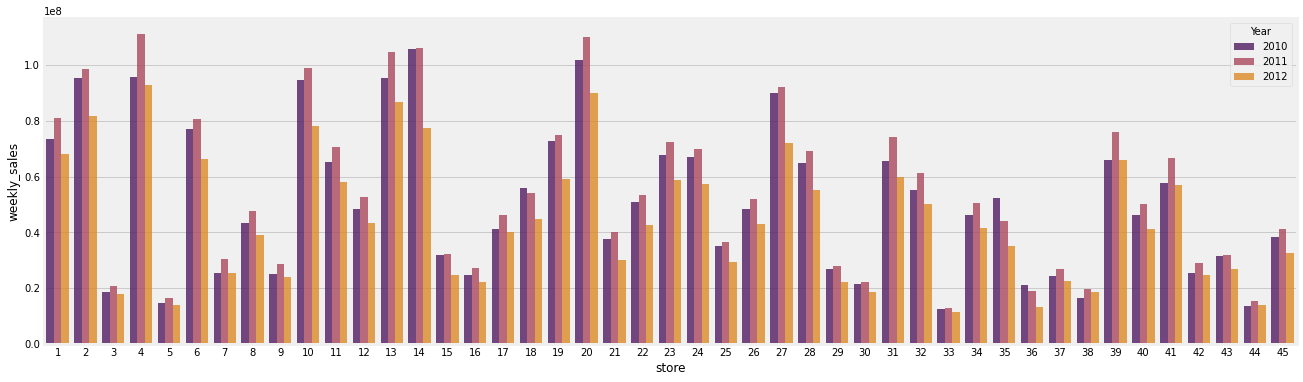

In [239]:
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 

plt.figure(figsize = (20,6))

sns.barplot(x = 'store', y = 'weekly_sales', data  = df_yearly_sales_stores, estimator = np.sum, hue = 'Year',
           ci = False,palette = 'inferno', alpha = 0.8)

plt.show()

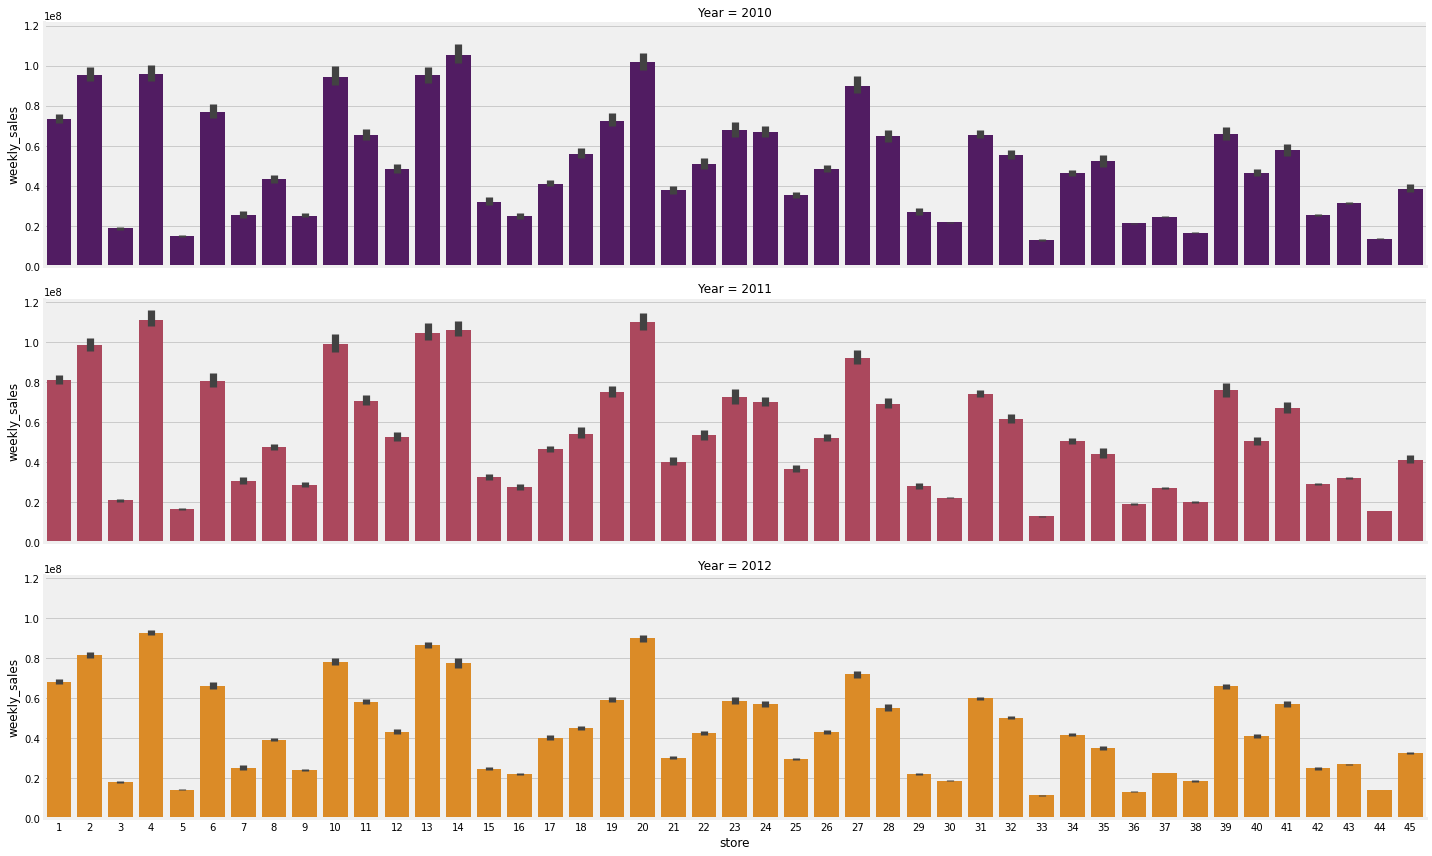

In [246]:
fg = sns.FacetGrid(df_yearly_sales_stores, row = 'Year',height = 4, aspect = 5, hue = 'Year', palette = 'inferno')

fg.map(sns.barplot,'store', 'weekly_sales', estimator = np.sum)

plt.show()

### 2010 - Master

In [254]:
## Year 2010

df2010_m = df_yearly_sales_stores[df_yearly_sales_stores['Year'] == 2010]
df2010 = df2010_m[['store','weekly_sales']].groupby('store').sum().reset_index()
df2010.head(1)


,store,weekly_sales
0,1,73278832.0


In [260]:
# preparation for pieplot

x2010 = list(df2010['weekly_sales'].values)
lable2010 = list(df2010['store'].values)


### 2011 - Master

In [253]:
df2011_m = df_yearly_sales_stores[df_yearly_sales_stores['Year'] == 2011]
df2011 = df2011_m[['store','weekly_sales']].groupby('store').sum().reset_index()
df2011.head(1)

,store,weekly_sales
0,1,80921918.83


In [261]:
# preparation for pieplot

x2011 = list(df2011['weekly_sales'].values)
lable2011 = list(df2011['store'].values)

### 2012 - Master

In [255]:

df2012_m = df_yearly_sales_stores[df_yearly_sales_stores['Year'] == 2012]
df2012 = df2012_m[['store','weekly_sales']].groupby('store').sum().reset_index()
df2012.head(1)

,store,weekly_sales
0,1,68202058.02


In [262]:
# preparation for pieplot

x2012 = list(df2012['weekly_sales'].values)
lable2012 = list(df2012['store'].values)


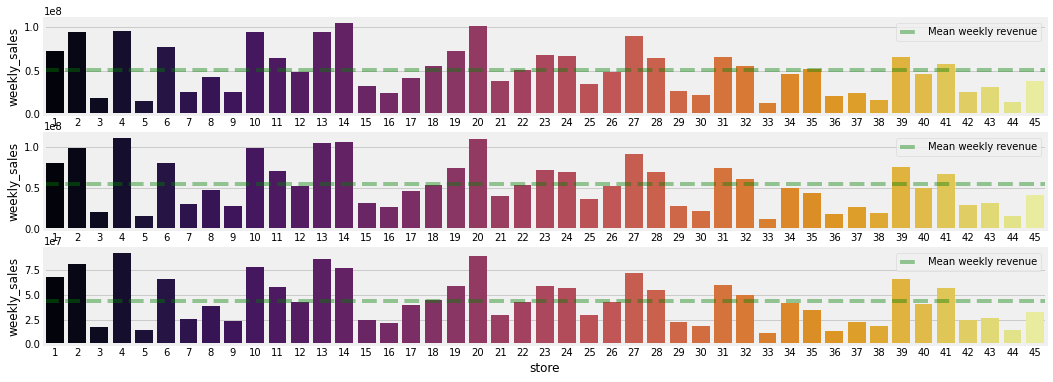

In [412]:
## 2010 - Details:

x2010 = list(df2010['weekly_sales'].values)
lable2010 = list(df2010['store'].values)

## 2011 - Details:
x2011 = list(df2011['weekly_sales'].values)
lable2011 = list(df2011['store'].values)

## 2012 - Details: 
x2012 = list(df2012['weekly_sales'].values)
lable2012 = list(df2012['store'].values)


plt.figure(figsize = (16,6))

plt.subplot(3,1,1)
sns.barplot(x ='store', y = 'weekly_sales', data = df2010, palette = 'inferno')
plt.axhline(df2010['weekly_sales'].mean(),ls = '--', color = 'green',alpha = 0.4,label = 'Mean weekly revenue')
plt.legend()

plt.subplot(3,1,2)
sns.barplot(x ='store', y = 'weekly_sales', data = df2011,palette = 'inferno')
plt.axhline(df2011['weekly_sales'].mean(),ls = '--', color = 'green',alpha = 0.4,label = 'Mean weekly revenue')
plt.legend()


plt.subplot(3,1,3)
sns.barplot(x ='store', y = 'weekly_sales', data = df2012,palette = 'inferno')
plt.axhline(df2012['weekly_sales'].mean(),ls = '--', color = 'green',alpha = 0.4,label = 'Mean weekly revenue')
plt.legend()

plt.legend()
plt.show()



In [311]:
df2010_m.head()

,store,weekly_sales,Year
0,1,1643690.90,2010
1,1,1641957.44,2010
2,1,1611968.17,2010
3,1,1409727.59,2010
4,1,1554806.68,2010


In [328]:

s = [2288886120.41,2448200007.35,2000132859.35]
l = ['2010','2011','2012']

dict1 = {'year': ['2010','2011','2012'], 'Total_weekly_revenue': [2288886120.41,2448200007.35,2000132859.35]}
df_y_r=  pd.DataFrame(dict1)

df_y_r     

,year,Total_weekly_revenue
0,2010,2.288886e+09
1,2011,2.448200e+09
2,2012,2.000133e+09


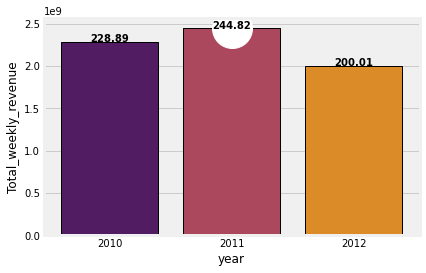

In [414]:
ax = sns.barplot( x = 'year', y = 'Total_weekly_revenue', data = df_y_r, palette = 'inferno', ci = True,
            linewidth = 1, edgecolor = 'black')


for container in (ax.containers):
    for bar in (container):
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2,h+0.5, str(round(h/10000000,2)),fontsize = 10, fontweight = 'bold',
               ha = 'center')

v = ax.containers[0][1].get_height()
plt.plot(1,v, 'o',markersize = 40,color = 'white')


plt.show()

###  **OBSERVATION** : 
 - among all years, 2011 had most weekly revenue. 
 - The following Stores did well in the resepective years: 
  - 2010 : 14,20
  - 2011 : 20,13,14
  - 2012 : 4,20 

## Show TheComparision of Sales ( avg and total) on holidays vs non-holidays

In [349]:
df.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010


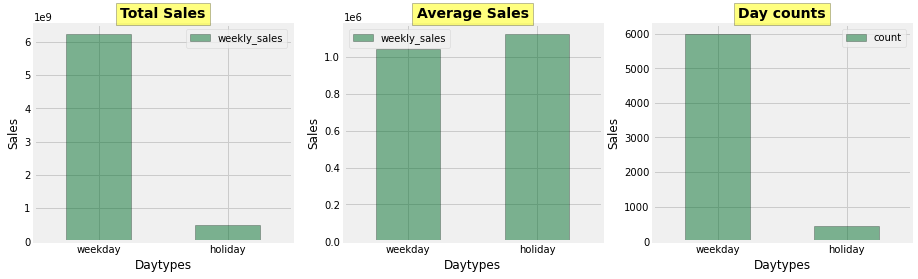

In [415]:
import seaborn as sns
import matplotlib.pyplot as plt 

df_hol_nonhol_sum = df.groupby('holiday_flag').sum().reset_index()
df_hol_nonhol_mean = df.groupby('holiday_flag').mean().reset_index()

accent_palette = sns.color_palette('Greens_r')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color = accent_palette)

plt.figure(figsize = (14,4))

plt.subplot(131)

ax1 = df_hol_nonhol_sum[['holiday_flag','weekly_sales']].plot(kind = 'bar', x='holiday_flag',y = 'weekly_sales',
                                                        align = 'center', alpha  = 0.5,edgecolor = 'black',
                                                        ax = plt.gca())
ax1.set_xticklabels(['weekday', 'holiday'])
plt.xticks(rotation = 0)
plt.title('Total Sales', fontsize = 14, fontweight = 'bold', bbox = {'facecolor': 'yellow','edgecolor': 'black', 'alpha': 0.5})
plt.xlabel('Daytypes', fontsize = 12)
plt.ylabel('Sales', fontsize = 12)


plt.subplot(132)
ax2 = df_hol_nonhol_mean[['holiday_flag','weekly_sales']].plot(kind = 'bar', x='holiday_flag',y = 'weekly_sales',
                                                         align = 'center', alpha  = 0.5,edgecolor = 'black', 
                                                         ax = plt.gca())
ax2.set_xticklabels(['weekday', 'holiday'])
plt.xticks(rotation = 0)
plt.title('Average Sales', fontsize = 14, fontweight = 'bold', bbox = {'facecolor': 'yellow','edgecolor': 'black', 'alpha': 0.5})
plt.xlabel('Daytypes', fontsize = 12)
plt.ylabel('Sales', fontsize = 12)



plt.subplot(133)
ax3 = df['holiday_flag'].value_counts().plot(kind = 'bar',align = 'center', alpha = 0.5, edgecolor = 'black',
                                       ax = plt.gca(),label = 'count')
ax3.set_xticklabels(['weekday', 'holiday'])
plt.xticks(rotation = 0)
plt.title('Day counts', fontsize = 14, fontweight = 'bold', bbox = {'facecolor': 'yellow','edgecolor': 'black', 'alpha': 0.5})
plt.xlabel('Daytypes', fontsize = 12)
plt.ylabel('Sales', fontsize = 12)



plt.legend()


plt.show()


- ValueError: 'A' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

###  **OBSERVATION** : 

    - Total Sales in weekday > holiday weeks
    - average sales in holidayweeks > non-holiday weeks



## Analyse Monthly and Season wise Sales

In [416]:
df.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010


In [417]:
df.columns = [i.lower() for i in df.columns]

In [418]:
df.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010


### month column

In [423]:
df['month'] = df['date'].dt.month

In [424]:
df.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3


### season column

**udf season_name**

In [425]:
def season_name(month):
    if month in [1,2,12]:
        return 'winter'
    if month in [3,4,5]:
        return 'spring'
    if month in [6,7,8]:
        return 'summer'
    if month in [9,10,11]:
        return 'autumn'

In [426]:
df['season']  = df['month'].apply(season_name)
df.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,season
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,winter
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,winter
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,winter
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,winter
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,spring


In [427]:
df_season_master = df.groupby('season').sum().reset_index()
df_season_master


,season,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month
0,autumn,35190,1.576562e+09,225,96343.09,5114.122,263107.018079,12135.479,3076605,15075
1,spring,40365,1.796771e+09,0,100792.28,6134.814,300719.079224,14146.676,3529305,6975
2,summer,41400,1.885721e+09,0,140610.66,6083.403,309365.397357,14290.184,3619845,12600
3,winter,31050,1.478165e+09,225,52625.41,4280.296,230915.469757,10902.198,2714805,6840


## Season wise sales

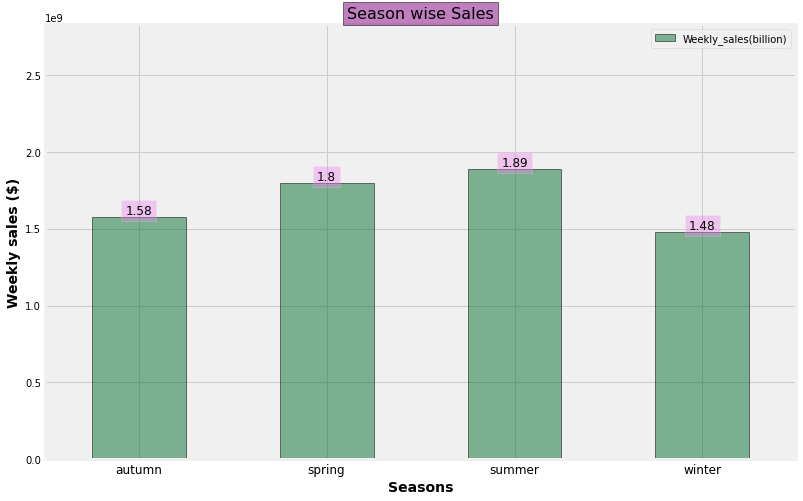

In [479]:

# using seaborn Palette
accent_palette = sns.color_palette('Greens_r')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color = accent_palette)

# setting figure size
plt.figure(figsize = (12,8))


ax2 = df_season_master[['season','weekly_sales']].plot(kind = 'bar', x = 'season', y = 'weekly_sales', align = 'center', alpha = 0.5,linewidth = 1,
                                                 edgecolor = 'black',
                                                 label = 'Weekly_sales(billion)', ax = plt.gca())

plt.xticks(rotation = 0, fontsize = 12)


# setting y axis limit to accomodate annotation
y_max  = df_season_master['weekly_sales'].max()
ax2.set_ylim(0, y_max * 1.5)



# annotation
for container in (ax2.containers):
    for bar in (container):
        h = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2,h, str(round(h/1000000000,2)),fontsize = 12, ha = 'center',
                va = 'bottom',bbox = {'facecolor': 'violet','alpha' : 0.4})

        
plt.xlabel('Seasons', fontsize = 14, fontweight = 'bold')
plt.ylabel('Weekly sales ($)', fontsize = 14, fontweight = 'bold')

plt.title('Season wise Sales', fontsize = 16,color = 'black', bbox ={'facecolor': 'purple','linewidth': 1, 'edgecolor': 'black',
                                                    'alpha': 0.5})

plt.legend()
plt.show()

## **Observation**
- we have had maximum sales in 'summer'

In [480]:
df.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,season
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,winter
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,winter
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,winter
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,winter
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,spring


## Effect of Temperature on Sales

### Adding a Temp category Column

In [483]:
def temp_type(temperature):
    if temperature <32: 
        return('very_cold')
    elif temperature >32 and temperature <50:
        return('cold')
    elif temperature >50 and temperature < 80:
        return('normal')
    elif temperature > 80:
        return('hot')
    
    

In [484]:
df['weather'] = df['temperature'].apply(temp_type)

In [485]:
df.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,season,weather
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,winter,cold
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,winter,cold
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,winter,cold
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,winter,cold
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,spring,cold


In [489]:
df_yearly_weather = df[['weekly_sales','weather','year']].groupby(['year','weather']).sum().reset_index()
df_yearly_weather

,year,weather,weekly_sales
0,2010,cold,5.042499e+08
1,2010,hot,3.243955e+08
2,2010,normal,1.241495e+09
3,2010,very_cold,2.187455e+08
4,2011,cold,6.455225e+08
5,2011,hot,3.426449e+08
6,2011,normal,1.225137e+09
7,2011,very_cold,2.348956e+08
8,2012,cold,3.425901e+08
9,2012,hot,3.287134e+08


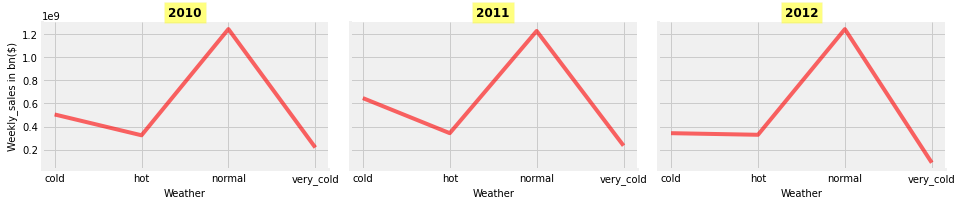

In [512]:
## FacetGrid

fg = sns.FacetGrid(df_yearly_weather, col = 'year', height = 3, aspect = 1.5)

fg.map(sns.lineplot,'weather','weekly_sales', color = 'red',alpha = 0.6)

## setting xlabels and ylabels
fg.set_axis_labels('Weather','Weekly_sales in bn($)', fontsize = 10)
fg.set_titles('{col_name}',fontsize = 10, fontweight = 'bold',bbox = {'facecolor': 'yellow','alpha': 0.5})


plt.show()

## **Observation**

- Excepting 2012, there is a drop in sales in extreme weather conditions
- comparision with hotter months, people preferred shopping in colder days. 
- Major shopping trends happend in normal weather conditions.


## Effect of cpi on Sales

In [519]:
df

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,season,weather
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,winter,cold
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,winter,cold
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,winter,cold
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,winter,cold
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,spring,cold
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,autumn,normal
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,autumn,normal
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,autumn,normal
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,autumn,normal


In [520]:
df.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment', 'year', 'month', 'season',
       'weather'],
      dtype='object')

In [522]:
df1 = df.copy()

In [523]:
df1.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,season,weather
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,winter,cold
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,winter,cold
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,winter,cold
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,winter,cold
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,spring,cold


In [604]:
df.head()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,season,weather
date,,,,,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,winter,cold
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,winter,cold
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,winter,cold
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,winter,cold
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,spring,cold


### Plotting CPI

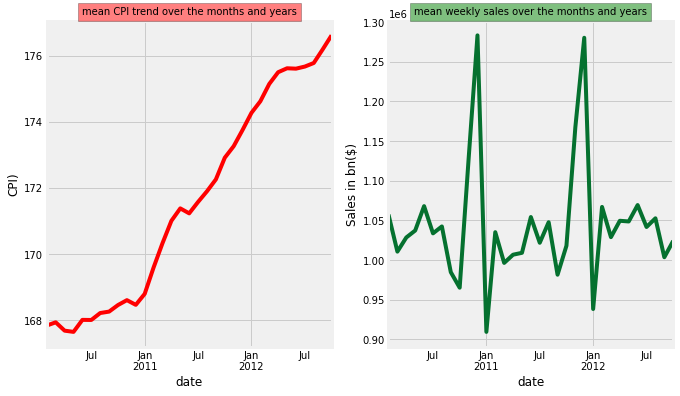

In [624]:

%matplotlib inline



plt.figure(figsize = (10,6))
plt.subplot(121)
df['cpi'].resample('M').mean().plot(color = 'red')

plt.title('mean CPI trend over the months and years', color = 'black', fontsize = 10,
          bbox = {'facecolor': 'red','alpha': 0.5, 'edgecolor': 'black'})
                                                                                
plt.ylabel('CPI)', fontsize = 12)


plt.subplot(122)
df['weekly_sales'].resample('M').mean().plot()
plt.title('mean weekly sales over the months and years', color = 'black', fontsize = 10,
          bbox = {'facecolor': 'green','alpha': 0.5, 'edgecolor': 'black'})
                                                                                
plt.ylabel('Sales in bn($)', fontsize = 12)

plt.show()


- cpi has  increased since 200

# created a copy of original dataframe

In [547]:

df1 = df

In [548]:
df1.head()

,date,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,season,weather
0,2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,winter,cold
1,2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,winter,cold
2,2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,winter,cold
3,2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,winter,cold
4,2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,spring,cold


In [549]:
# setting the index, so that timeseries analysis can be done

df1.set_index('date',inplace = True)

In [550]:
df1

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,season,weather
date,,,,,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,winter,cold
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,winter,cold
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,winter,cold
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,winter,cold
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,spring,cold
...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,45,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,autumn,normal
2012-10-05,45,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,autumn,normal
2012-10-12,45,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,autumn,normal


### database capturing cpi on a monthly basis over the years

In [554]:

xcpi = df1['cpi'].resample('M').mean().reset_index()
xcpi.head()

,date,cpi
0,2010-02-28,167.834459
1,2010-03-31,167.930846
2,2010-04-30,167.678437
3,2010-05-31,167.641758
4,2010-06-30,168.004688


### database capturing WEEKLY_SALES on a monthly basis over the years

In [555]:
xws = df1['weekly_sales'].resample('M').mean().reset_index()
xws.head()

,date,weekly_sales
0,2010-02-28,1.057405e+06
1,2010-03-31,1.010666e+06
2,2010-04-30,1.028499e+06
3,2010-05-31,1.037283e+06
4,2010-06-30,1.068034e+06


### merged it on 'date'

In [557]:
x_cpi_ws_merged = pd.merge(xcpi,xws, on = 'date', how = 'inner')
x_cpi_ws_merged.head()

,date,cpi,weekly_sales
0,2010-02-28,167.834459,1.057405e+06
1,2010-03-31,167.930846,1.010666e+06
2,2010-04-30,167.678437,1.028499e+06
3,2010-05-31,167.641758,1.037283e+06
4,2010-06-30,168.004688,1.068034e+06


In [561]:
# created a column to capture sales in millions
x_cpi_ws_merged['weekly_sales_in_billion'] = round(x_cpi_ws_merged['weekly_sales']/1000000,2)
x_cpi_ws_merged.head()

,date,cpi,weekly_sales,weekly_sales_in_billion
0,2010-02-28,167.834459,1.057405e+06,1.06
1,2010-03-31,167.930846,1.010666e+06,1.01
2,2010-04-30,167.678437,1.028499e+06,1.03
3,2010-05-31,167.641758,1.037283e+06,1.04
4,2010-06-30,168.004688,1.068034e+06,1.07


In [563]:
# column to capture cpi with rounded

x_cpi_ws_merged['cpi_rounded'] = round(x_cpi_ws_merged['cpi'],2)
x_cpi_ws_merged.head()

,date,cpi,weekly_sales,weekly_sales_in_billion,cpi_rounded
0,2010-02-28,167.834459,1.057405e+06,1.06,167.83
1,2010-03-31,167.930846,1.010666e+06,1.01,167.93
2,2010-04-30,167.678437,1.028499e+06,1.03,167.68
3,2010-05-31,167.641758,1.037283e+06,1.04,167.64
4,2010-06-30,168.004688,1.068034e+06,1.07,168.00


In [564]:
# mistake: values are in millions

x_cpi_ws_merged.rename(columns = {'weekly_sales_in_billion': 'weekly_sales_in_million'},inplace = True)
x_cpi_ws_merged

,date,cpi,weekly_sales,weekly_sales_in_million,cpi_rounded
0,2010-02-28,167.834459,1.057405e+06,1.06,167.83
1,2010-03-31,167.930846,1.010666e+06,1.01,167.93
2,2010-04-30,167.678437,1.028499e+06,1.03,167.68
3,2010-05-31,167.641758,1.037283e+06,1.04,167.64
4,2010-06-30,168.004688,1.068034e+06,1.07,168.00
5,2010-07-31,168.001633,1.033689e+06,1.03,168.00
6,2010-08-31,168.211886,1.042445e+06,1.04,168.21
7,2010-09-30,168.255024,9.848216e+05,0.98,168.26
8,2010-10-31,168.453666,9.651637e+05,0.97,168.45
9,2010-11-30,168.601460,1.126963e+06,1.13,168.60


In [568]:
# drop the cpi column, we have the rounded values ready

x_cpi_ws_merged.drop('cpi', axis = 1,inplace = True)


In [569]:
x_cpi_ws_merged.head()

,date,weekly_sales,weekly_sales_in_million,cpi_rounded
0,2010-02-28,1.057405e+06,1.06,167.83
1,2010-03-31,1.010666e+06,1.01,167.93
2,2010-04-30,1.028499e+06,1.03,167.68
3,2010-05-31,1.037283e+06,1.04,167.64
4,2010-06-30,1.068034e+06,1.07,168.00


## corelation check

In [573]:
plt.figure(figsize = (22,18))
corr = x_cpi_ws_merged.corr()

corr

,weekly_sales,weekly_sales_in_million,cpi_rounded
weekly_sales,1.000000,0.999352,0.039114
weekly_sales_in_million,0.999352,1.000000,0.033159
cpi_rounded,0.039114,0.033159,1.000000


<Figure size 1584x1296 with 0 Axes>

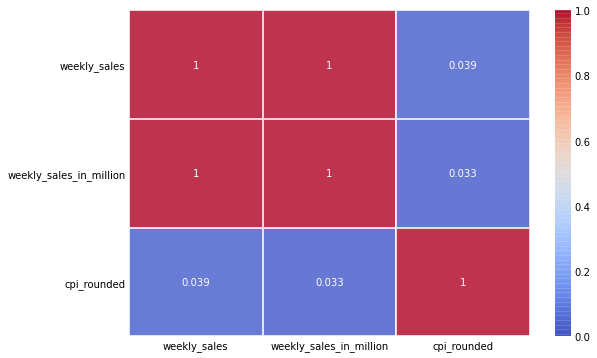

In [591]:
plt.figure(figsize = (8,6))

sns.heatmap(corr, vmin = 0, vmax = 1.0, annot = True, annot_kws = {'fontsize': 10, 'color': 'white'},
            cmap = 'coolwarm',linewidth = 1,linecolor = 'white', cbar = True ,alpha = 0.8,
            )

plt.show()

### **Observation:**
- as we can see there isnt any strong corelation between cpi and weekly sales

### scatterplot

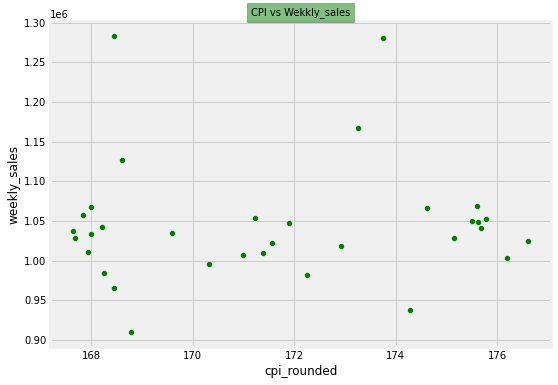

In [627]:
plt.figure(figsize = (8,6))

sns.scatterplot(x = 'cpi_rounded', y = 'weekly_sales', data = x_cpi_ws_merged, palette = 'inferno',
                color = 'green')

plt.title('CPI vs Wekkly_sales', color = 'black', fontsize = 10,
          bbox = {'facecolor': 'green','alpha': 0.5, 'edgecolor': 'black'})

plt.show()

- ### **Observation **
 - very less coorelation betwen cpi and wekly revenue
 - people have purchased when cpi was higher as well as lower

In [629]:
df.reset_index(inplace = True)
df

,date,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,season,weather
0,2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,winter,cold
1,2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,winter,cold
2,2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,winter,cold
3,2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,winter,cold
4,2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,spring,cold
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,2012-09-28,45,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,autumn,normal
6431,2012-10-05,45,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,autumn,normal
6432,2012-10-12,45,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,autumn,normal
6433,2012-10-19,45,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,autumn,normal


## Effect of unemployment on Sales

In [631]:
df.set_index('date', inplace = True)

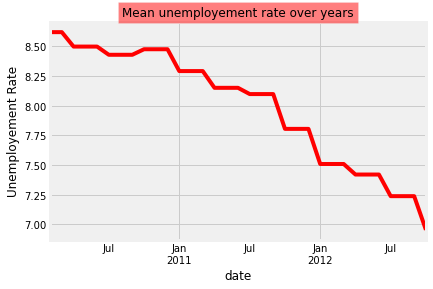

In [656]:
df['unemployment'].resample('M').mean().plot(color = 'red')

plt.title('Mean unemployement rate over years', fontsize = 12,color = 'black', 
          bbox = {'facecolor': 'red','alpha':0.5})

plt.ylabel('Unemployement Rate', fontsize = 12)
plt.show()


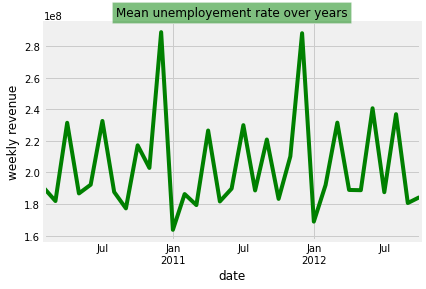

In [658]:
df['weekly_sales'].resample('M').sum().plot(color = 'green')

plt.title('Mean unemployement rate over years', fontsize = 12,color = 'black', 
          bbox = {'facecolor': 'green','alpha':0.5})

plt.ylabel('weekly revenue', fontsize = 12)

plt.show()

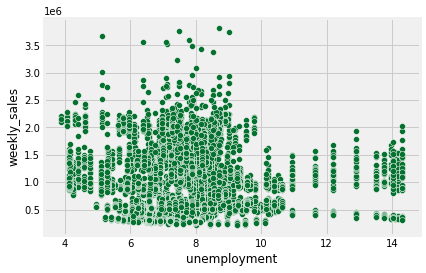

In [640]:
sns.scatterplot(x = 'unemployment', y = 'weekly_sales', data = df)
plt.show()

In [641]:
corr1 = df.corr()

In [642]:
corr1

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month
store,1.000000e+00,-0.335332,6.250842e-20,-0.022659,0.060023,-0.209492,0.223531,0.000000,1.260329e-18
weekly_sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,-0.018378,7.614332e-02
holiday_flag,6.250842e-20,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,-0.056783,1.229958e-01
temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,0.064269,2.358618e-01
fuel_price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,0.779470,-4.215590e-02
cpi,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,0.074796,4.979672e-03
unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,-0.241813,-1.274559e-02
year,0.000000e+00,-0.018378,-5.678257e-02,0.064269,0.779470,0.074796,-0.241813,1.000000,-1.944645e-01
month,1.260329e-18,0.076143,1.229958e-01,0.235862,-0.042156,0.004980,-0.012746,-0.194465,1.000000e+00


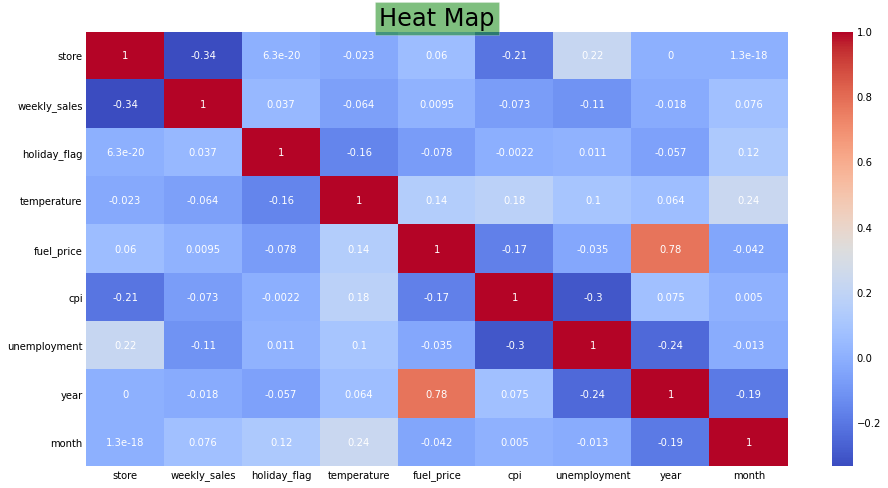

In [660]:
plt.figure(figsize = (14,8))

sns.heatmap(corr1, cmap=  'coolwarm', annot = True, annot_kws = {'fontsize': 10, 'color': 'white'})


plt.title('Heat Map', fontsize = 24,color = 'black', 
          bbox = {'facecolor': 'green','alpha':0.5})

plt.show()

- thus, we can see there is no positive corelation between unemployment rate and weekly sales
